### **Student Information**
Name: 許晁瑋

Student ID: NCCU 113351046

GitHub ID: ChaoWei-Hsu

Kaggle name: Chao-Wei Hsu

Kaggle private scoreboard snapshot: 

![kaggle.png](./pics/kaggle.png)

---

# **Instructions**

For this lab we have divided the assignments into **three phases/parts**. The `first two phases` refer to the `exercises inside the Master notebooks` of the [DM2025-Lab2-Exercise Repo](https://github.com/difersalest/DM2025-Lab2-Exercise.git). The `third phase` refers to an `internal Kaggle competition` that we are gonna run among all the Data Mining students. Together they add up to `100 points` of your grade. There are also some `bonus points` to be gained if you complete `extra exercises` in the lab **(bonus 15 pts)** and in the `Kaggle Competition report` **(bonus 5 pts)**.

**Environment recommendations to solve lab 2:**
- **Phase 1 exercises:** Need GPU for training the models explained in that part, if you don't have a GPU in your laptop it is recommended to run in Colab or Kaggle for a faster experience, although with CPU they can still be solved but with a slower execution.
- **Phase 2 exercises:** We use Gemini's API so everything can be run with only CPU without a problem.
- **Phase 3 exercises:** For the competition you will probably need GPU to train your models, so it is recommended to use Colab or Kaggle if you don't have a laptop with a dedicated GPU.
- **Optional Ollama Notebook (not graded):** You need GPU, at least 4GB of VRAM with 16 GB of RAM to run the local open-source LLM models. 

## **Phase 1 (30 pts):**

1. __Main Exercises (25 pts):__ Do the **take home exercises** from Sections: `1. Data Preparation` to `9. High-dimension Visualization: t-SNE and UMAP`, in the [DM2025-Lab2-Master-Phase_1 Notebook](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/DM2025-Lab2-Master-Phase_1.ipynb). Total: `8 exercises`. Commit your code and submit the repository link to NTU Cool **`BEFORE the deadline (Nov. 3th, 11:59 pm, Monday)`**

2. **Code Comments (5 pts):** **Tidy up the code in your notebook**. 

## **Phase 2 (30 pts):**

1. **Main Exercises (25 pts):** Do the remaining **take home exercises** from Section: `2. Large Language Models (LLMs)` in the [DM2025-Lab2-Master-Phase_2_Main Notebook](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/DM2025-Lab2-Master-Phase_2_Main.ipynb). Total: `5 exercises required from sections 2.1, 2.2, 2.4 and 2.6`. Commit your code and submit the repository link to NTU Cool **`BEFORE the deadline (Nov. 24th, 11:59 pm, Monday)`**

2. **Code Comments (5 pts):** **Tidy up the code in your notebook**. 

3. **`Bonus (15 pts):`** Complete the bonus exercises in the [DM2025-Lab2-Master-Phase_2_Bonus Notebook](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/DM2025-Lab2-Master-Phase_2_Bonus.ipynb) and [DM2025-Lab2-Master-Phase_2_Main Notebook](https://github.com/difersalest/DM2025-Lab2-Exercise/blob/main/DM2025-Lab2-Master-Phase_2_Main.ipynb) `where 2 exercises are counted as bonus from sections 2.3 and 2.5 in the main notebook`. Total: `7 exercises`. Commit your code and submit the repository link to NTU Cool **`BEFORE the deadline (Nov. 24th, 11:59 pm, Monday)`**

## **Phase 3 (40 pts):**

1. **Kaggle Competition Participation (30 pts):** Participate in the in-class **Kaggle Competition** regarding Emotion Recognition on Twitter by clicking in this link: **[Data Mining Class Kaggle Competition](https://www.kaggle.com/t/3a2df4c6d6b4417e8bf718ed648d7554)**. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20 pts of the 30 pts in this competition participation part.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **`BEFORE the deadline (Nov. 24th, 11:59 pm, Monday)`**. Make sure to take a screenshot of your position at the end of the competition and store it as `pic_ranking.png` under the `pics` folder of this repository and rerun the cell **Student Information**.

2. **Competition Report (10 pts)** A report section to be filled in inside this notebook in Markdown Format, we already provided you with the template below. You need to describe your work developing the model for the competition. The report should include a section describing briefly the following elements: 
* Your preprocessing steps.
* The feature engineering steps.
* Explanation of your model.

* **`Bonus (5 pts):`**
    * You will have to describe more detail in the previous steps.
    * Mention different things you tried.
    * Mention insights you gained. 

[Markdown Guide - Basic Syntax](https://www.markdownguide.org/basic-syntax/)

**`Things to note for Phase 3:`**

* **The code used for the competition should be in this Jupyter Notebook File** `DM2025-Lab2-Homework.ipynb`.

* **Push the code used for the competition to your repository**.

* **The code should have a clear separation for the same sections of the report, preprocessing, feature engineering and model explanation. Briefly comment your code for easier understanding, we provide a template at the end of this notebook.**

* Showing the kaggle screenshot of the ranking plus the code in this notebook will ensure the validity of your participation and the report to obtain the corresponding points.

After the competition ends you will have two days more to submit the `DM2025-Lab2-Homework.ipynb` with your report in markdown format and your code. Do everything **`BEFORE the deadline (Nov. 26th, 11:59 pm, Wednesday) to obtain 100% of the available points.`**

Upload your files to your repository then submit the link to it on the corresponding NTU Cool assignment.

## **Deadlines:**

![lab2_deadlines](./pics/lab2_deadlines.png)

**`From here on starts the code section for the competition.`**

---

# **Competition Code**

## 1. Preprocessing Steps

In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

2.8.0+cu126
12.6
True
NVIDIA GeForce RTX 4070 SUPER


In [6]:
import pandas as pd
import numpy as np
import json
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import emoji

# --- Configuration ---
PATH_JSON = "C:/Users/User/Desktop/Paper/kaggle/dm-lab-2-private-competition/final_posts.json"
PATH_SPLIT = "C:/Users/User/Desktop/Paper/kaggle/dm-lab-2-private-competition/data_identification.csv"
PATH_EMOTION = "C:/Users/User/Desktop/Paper/kaggle/dm-lab-2-private-competition/emotion.csv"
PATH_SUBMISSION = "submission.csv"

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    
    # Normalize user mentions
    text = re.sub(r'@\w+', '@user', text)
    # Convert emojis to text description
    text = emoji.demojize(text, delimiters=(" ", " "))
    
    return text

print("=== Step 1: Data Preprocessing ============")

# --- Load Data ---

# Load JSON
with open(PATH_JSON, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract nested post data
post_data = []
for item in data:
    post = item.get('root', {}).get('_source', {}).get('post', {})
    if post:
        post_data.append({
            'id': post.get('post_id'),
            'text': post.get('text')
        })
df_posts = pd.DataFrame(post_data)

# Load CSVs
df_split = pd.read_csv(PATH_SPLIT, sep=',')
df_emotion = pd.read_csv(PATH_EMOTION, sep=',')

# --- Merge & Clean ---

# Merge datasets
df_merged = pd.merge(df_posts, df_split, on='id', how='left')
df_merged = pd.merge(df_merged, df_emotion, on='id', how='left')

# Handle missing values
df_merged = df_merged.dropna(subset=['text'])
df_merged['text'] = df_merged['text'].astype(str)

# Apply text preprocessing
df_merged['text_cleaned'] = df_merged['text'].apply(preprocess_text)

# --- Split Data ---
df_train_full = df_merged[df_merged['split'] == 'train'].copy()
df_test = df_merged[df_merged['split'] == 'test'].copy()

print(f"Train set size: {len(df_train_full)}")
print(f"Test set size: {len(df_test)}")

# --- Analysis ---
print("\n--- Emotion Distribution ---")
if 'emotion' in df_train_full.columns:
    distribution_df = pd.DataFrame({
        'Count': df_train_full['emotion'].value_counts(),
        'Percentage (%)': (df_train_full['emotion'].value_counts(normalize=True) * 100).round(2)
    })
    print(distribution_df)
else:
    print("[Error] 'emotion' column missing.")

# --- Verification ---
print("\n--- Sample Output ---")
pd.set_option('display.max_colwidth', None)
print(df_merged[['text', 'text_cleaned']].iloc[14:18])

print("\n=== Step 1 Complete! =============================================================")

=== Step 1: Data Preprocessing ============
Train set size: 47890
Test set size: 16281

--- Emotion Distribution ---
          Count  Percentage (%)
emotion                        
joy       23797           49.69
anger     10694           22.33
surprise   6281           13.12
sadness    3926            8.20
fear       2009            4.20
disgust    1183            2.47

--- Sample Output ---
                                                                                                   text  \
14  Rap that will Cut other raper's throat. Who said that? @Paedeezy #badd #wicked. #bright city lights   
15                She’s a good person who stands up for people not like her, and they can’t stand that.   
16                            Okay I can see this looking really cool for a festival or photos though 😄   
17                                     I do but I like my job. I just hate the fact I HAVE to go do it.   

                                                                    

In [27]:
import pandas as pd
import numpy as np
import json
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import emoji

# --- Configuration ---
PATH_JSON = "C:/Users/User/Desktop/Paper/kaggle/dm-lab-2-private-competition/final_posts.json"
PATH_SPLIT = "C:/Users/User/Desktop/Paper/kaggle/dm-lab-2-private-competition/data_identification.csv"
PATH_EMOTION = "C:/Users/User/Desktop/Paper/kaggle/dm-lab-2-private-competition/emotion.csv"

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'@\w+', '@user', text)
    text = emoji.demojize(text, delimiters=(" ", " "))
    return text

print("=== Step 1: Data Preprocessing & Augmentation ============")

# --- Load Data ---
with open(PATH_JSON, 'r', encoding='utf-8') as f:
    data = json.load(f)

post_data = [{'id': item['root']['_source']['post']['post_id'], 'text': item['root']['_source']['post']['text']} 
             for item in data if item.get('root', {}).get('_source', {}).get('post', {})]
df_posts = pd.DataFrame(post_data)

df_split = pd.read_csv(PATH_SPLIT, sep=',')
df_emotion = pd.read_csv(PATH_EMOTION, sep=',')

# --- Merge & Clean ---
df_merged = pd.merge(df_posts, df_split, on='id', how='left')
df_merged = pd.merge(df_merged, df_emotion, on='id', how='left')
df_merged = df_merged.dropna(subset=['text'])
df_merged['text'] = df_merged['text'].astype(str)
df_merged['text_cleaned'] = df_merged['text'].apply(preprocess_text)

# --- Split Data ---
df_train_raw = df_merged[df_merged['split'] == 'train'].copy()
df_test = df_merged[df_merged['split'] == 'test'].copy()

print(f"Original Train set size: {len(df_train_raw)}")

# --- Data Augmentation ---
print("\n--- Applying Minority Oversampling ---")

class_counts = df_train_raw['emotion'].value_counts()
target_count = int(class_counts.quantile(0.3))
print(f"Target sample count per class: {target_count}")

dfs_augmented = []

for emotion, count in class_counts.items():
    df_class = df_train_raw[df_train_raw['emotion'] == emotion]
    
    if count < target_count:
        df_class_over = resample(df_class, 
                                 replace=True, 
                                 n_samples=target_count, 
                                 random_state=42)
        dfs_augmented.append(df_class_over)
    else:
        dfs_augmented.append(df_class)

df_train_full = pd.concat(dfs_augmented).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Augmented Train set size: {len(df_train_full)}")
print("All classes after augmentation:")
print(df_train_full['emotion'].value_counts()) 

# --- Analysis ---
print("\n--- Emotion Distribution ---")
if 'emotion' in df_train_full.columns:
    print(df_train_full['emotion'].value_counts(normalize=True))

print("\n=== Step 1 Complete!  ===================================")

=== Step 1: Data Preprocessing & Augmentation ============
Original Train set size: 47890

--- Applying Minority Oversampling ---
Target sample count per class: 2967
Augmented Train set size: 50632
All classes after augmentation:
emotion
joy         23797
anger       10694
surprise     6281
sadness      3926
fear         2967
disgust      2967
Name: count, dtype: int64

--- Emotion Distribution ---
emotion
joy         0.469999
anger       0.211210
surprise    0.124052
sadness     0.077540
fear        0.058599
disgust     0.058599
Name: proportion, dtype: float64

=== Step 1 Complete!  ===================================


## 2. Feature Engineering Steps

In [29]:
import torch
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import os

# --- Configuration List (7-Model Ensemble) ---
print("\n=== Step 2: Feature Engineering (7-Model Ensemble) =========\n")

MODEL_CONFIGS = [
    # 1. BERT Original
    {"name": "bert",             "model_id": "monologg/bert-base-cased-goemotions-original"},
    
    # 2. RoBERTa
    {"name": "roberta",          "model_id": "SamLowe/roberta-base-go_emotions"},
    
    # 3. Twitter RoBERTa
    {"name": "twitter_roberta",  "model_id": "cardiffnlp/twitter-roberta-base-emotion"},
    
    # 4. DistilBERT Student
    {"name": "distilbert_student", "model_id": "joeddav/distilbert-base-uncased-go-emotions-student"},
    
    # 5. DistilRoBERTa
    {"name": "distil_emotion",   "model_id": "j-hartmann/emotion-english-distilroberta-base"},
    
    # 6. BERT Group
    {"name": "bert_group",       "model_id": "monologg/bert-base-cased-goemotions-group"},
    
    # 7. BERT Ekman
    {"name": "bert_ekman",       "model_id": "monologg/bert-base-cased-goemotions-ekman"}
]

MAX_LENGTH = 64

# --- Check Data Availability ---
if 'df_train_full' not in locals():
    print("[Error] 'df_train_full' variable not found.")
    print("Please run Step 1 (Data Loading) first, or uncomment the manual loading block below.")

if 'df_train_full' in locals():
    # --- Label Encoding ---
    print("Encoding Labels...")
    label_encoder = LabelEncoder()
    df_train_full['emotion_encoded'] = label_encoder.fit_transform(df_train_full['emotion'])
    num_classes = len(label_encoder.classes_)
    print(f"Num Classes: {num_classes}")

    # --- Split Data ---
    print("\n--- Creating Validation Split ---")

    df_train, df_val = train_test_split(
        df_train_full,
        test_size=0.4,
        random_state=42,
        stratify=df_train_full['emotion_encoded']
    )

    # Extract raw texts
    train_texts = df_train['text_cleaned'].tolist()
    val_texts = df_val['text_cleaned'].tolist()
    test_texts = df_test['text_cleaned'].tolist()

    y_train = df_train['emotion_encoded'].values
    y_val = df_val['emotion_encoded'].values
    test_ids = df_test['id'].values

    print(f"Train samples: {len(train_texts)}, Validation samples: {len(val_texts)}")

    # --- Loop Through Each Model ---
    for config in MODEL_CONFIGS:
        short_name = config["name"]
        model_name = config["model_id"]
        output_path = f"preprocessed_{short_name}.pt"
        
        print(f"\n------------------------------------------------------")
        print(f"Processing Model: {short_name.upper()} ({model_name})")
        print(f"------------------------------------------------------")

        # 1. Load Tokenizer
        try:
            tokenizer = AutoTokenizer.from_pretrained(model_name)
        except OSError as e:
            print(f"[Error] Failed to load tokenizer for {model_name}.")
            continue

        # 2. Tokenize
        print("Tokenizing...")
        train_encodings = tokenizer(train_texts, padding='max_length', truncation=True, max_length=MAX_LENGTH)
        val_encodings = tokenizer(val_texts, padding='max_length', truncation=True, max_length=MAX_LENGTH)
        test_encodings = tokenizer(test_texts, padding='max_length', truncation=True, max_length=MAX_LENGTH)

        # 3. Save Artifacts
        print(f"Saving to {output_path}...")
        data_to_save = {
            'train_encodings': train_encodings,
            'val_encodings': val_encodings,
            'test_encodings': test_encodings,
            'y_train': torch.tensor(y_train, dtype=torch.long),
            'y_val': torch.tensor(y_val, dtype=torch.long),
            'test_ids': test_ids,
            'label_encoder': label_encoder,
            'num_classes': num_classes,
            'MODEL_NAME': model_name,
            'SHORT_NAME': short_name
        }
        
        torch.save(data_to_save, output_path)

    print("\n=== Step 2 Complete! All 7 datasets prepared. ====")


=== Step 2: Feature Engineering (7-Model Ensemble) =========

Encoding Labels...
Num Classes: 6

--- Creating Validation Split ---
Train samples: 30379, Validation samples: 20253

------------------------------------------------------
Processing Model: BERT (monologg/bert-base-cased-goemotions-original)
------------------------------------------------------
Tokenizing...
Saving to preprocessed_bert.pt...

------------------------------------------------------
Processing Model: ROBERTA (SamLowe/roberta-base-go_emotions)
------------------------------------------------------
Tokenizing...
Saving to preprocessed_roberta.pt...

------------------------------------------------------
Processing Model: TWITTER_ROBERTA (cardiffnlp/twitter-roberta-base-emotion)
------------------------------------------------------
Tokenizing...
Saving to preprocessed_twitter_roberta.pt...

------------------------------------------------------
Processing Model: DISTILBERT_STUDENT (joeddav/distilbert-base-unca

## 3. Model Implementation Steps

In [30]:
import torch
import numpy as np
import pandas as pd
import evaluate
from transformers import (AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback, AutoTokenizer, AutoConfig)
import torch.nn.functional as F
import os
import gc 

# --- Dataset Class ---
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

# --- Custom Trainer ---
class CustomTrainer(Trainer):
    def __init__(self, class_weights=None, **kwargs):
        super().__init__(**kwargs)
        self.class_weights = class_weights

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        forward_inputs = {k: v for k, v in inputs.items() if k != "labels"}
        outputs = model(**forward_inputs)
        logits = outputs.get("logits")
        
        # Focal Loss Calculation
        gamma = 2.0
        if self.class_weights is not None:
             weight = self.class_weights.to(logits.device)
        else:
             weight = None

        ce_loss = F.cross_entropy(logits, labels, reduction='none', weight=weight)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** gamma * ce_loss).mean()
        
        return (focal_loss, outputs) if return_outputs else focal_loss

# --- Configuration Queue (7-Model Ensemble) ---
print("\n=== Step 3: Training 7 Models =========\n")

TRAINING_QUEUE = [
    # 1. BERT Original
    {"data_path": "preprocessed_bert.pt", "output_dir": "./results_bert", "batch_size": 32, "grad_accum": 2, "grad_checkpoint": False},
    
    # 2. RoBERTa
    {"data_path": "preprocessed_roberta.pt", "output_dir": "./results_roberta", "batch_size": 16, "grad_accum": 2, "grad_checkpoint": False},
    
    # 3. Twitter RoBERTa
    {"data_path": "preprocessed_twitter_roberta.pt", "output_dir": "./results_twitter_roberta", "batch_size": 16, "grad_accum": 2, "grad_checkpoint": False},
    
    # 4. DistilBERT Student (Replaced DeBERTa)
    {"data_path": "preprocessed_distilbert_student.pt", "output_dir": "./results_distilbert_student", "batch_size": 16, "grad_accum": 2, "grad_checkpoint": False},
    
    # 5. DistilRoBERTa
    {"data_path": "preprocessed_distil_emotion.pt", "output_dir": "./results_distil_emotion", "batch_size": 16, "grad_accum": 2, "grad_checkpoint": False},
    
    # 6. BERT Group
    {"data_path": "preprocessed_bert_group.pt", "output_dir": "./results_bert_group", "batch_size": 16, "grad_accum": 2, "grad_checkpoint": False},
    
    # 7. BERT Ekman
    {"data_path": "preprocessed_bert_ekman.pt", "output_dir": "./results_bert_ekman", "batch_size": 16, "grad_accum": 2, "grad_checkpoint": False},
]

metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    f1_macro = metric.compute(predictions=predictions, references=labels, average="macro")
    return f1_macro

# --- Main Training Loop ---
for config in TRAINING_QUEUE:
    # Clean up memory from previous iteration
    if 'model' in locals(): del model
    if 'trainer' in locals(): del trainer
    torch.cuda.empty_cache()
    gc.collect()
    
    data_path = config["data_path"]
    model_output_dir = config["output_dir"]

    print(f"\n========================================================")
    print(f"Loading Data: {data_path}")
    print(f"Target Output: {model_output_dir}")
    print(f"========================================================")

    # 1. Load Data
    try:
        data = torch.load(data_path, weights_only=False)
    except FileNotFoundError:
        print(f"[Warning] File {data_path} not found. Skipping.")
        continue
        
    train_encodings = data['train_encodings']
    val_encodings = data['val_encodings']
    y_train = data['y_train']
    y_val = data['y_val']
    label_encoder = data['label_encoder']
    num_classes = data['num_classes']
    MODEL_NAME = data['MODEL_NAME']

    print(f"Backbone Model: {MODEL_NAME}")

    # 2. Weights
    train_labels_np = y_train.cpu().numpy()
    unique_classes, class_counts = np.unique(train_labels_np, return_counts=True)
    n_classes = len(unique_classes)
    weights = (1.0 - 0.995) / (1.0 - np.power(0.995, class_counts))
    weights = weights / np.sum(weights) * n_classes
    class_weights_tensor = torch.tensor(weights, dtype=torch.float)

    # 3. Datasets
    train_dataset = EmotionDataset(train_encodings, y_train)
    val_dataset = EmotionDataset(val_encodings, y_val)

    # 4. Load Model (Robust Loading)
    print("Loading Model Weights...")
    try:
        # A. Load Config first to handle different parameter names
        config_obj = AutoConfig.from_pretrained(
            MODEL_NAME,
            num_labels=num_classes,
            id2label={i: label for i, label in enumerate(label_encoder.classes_)},
            label2id={label: i for i, label in enumerate(label_encoder.classes_)},
        )

        # B. Smartly Set Dropout based on Architecture
        # BERT / RoBERTa uses 'hidden_dropout_prob'
        if hasattr(config_obj, "hidden_dropout_prob"):
            config_obj.hidden_dropout_prob = 0.2
            config_obj.attention_probs_dropout_prob = 0.2
        
        # DistilBERT uses 'dropout' or 'seq_class_dropout'
        elif hasattr(config_obj, "dropout"):
            config_obj.dropout = 0.2
            if hasattr(config_obj, "attention_dropout"):
                config_obj.attention_dropout = 0.2
        
        # C. Load Model with the modified config
        model = AutoModelForSequenceClassification.from_pretrained(
            MODEL_NAME, 
            config=config_obj,
            ignore_mismatched_sizes=True 
        )

    except Exception as e:
        print(f"Error loading model {MODEL_NAME}: {e}")
        continue

    if config["grad_checkpoint"]:
        model.gradient_checkpointing_enable()
        model.config.use_cache = False
    
    # 5. Training Arguments
    training_args = TrainingArguments(
        output_dir=model_output_dir,
        per_device_train_batch_size=config["batch_size"],       
        gradient_accumulation_steps=config["grad_accum"],
        gradient_checkpointing=config["grad_checkpoint"],
        
        fp16=True,                          
        num_train_epochs=20, 
        learning_rate=2e-5, 
        warmup_ratio=0.1,
        weight_decay=0.3,
        lr_scheduler_type="cosine",
        
        eval_strategy="steps",             
        eval_steps=100,                     
        save_strategy="steps",              
        save_steps=100, 
        save_total_limit=1,                
        load_best_model_at_end=True,        
        metric_for_best_model="f1",        
        
        logging_dir=f'./logs_{config["output_dir"]}',
        logging_steps=20,
        report_to="none",                 
    )

    # 6. Trainer
    early_stopping = EarlyStoppingCallback(early_stopping_patience=5)

    trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
        callbacks=[early_stopping],
        class_weights=class_weights_tensor
    )

    # 7. Start Training
    print(f"Starting Training for {MODEL_NAME}...")
    trainer.train()

    # 8. Save
    print(f"Saving best model to {model_output_dir}...")
    trainer.save_model(model_output_dir)
    try:
        model.config.save_pretrained(model_output_dir)
        tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
        tokenizer.save_pretrained(model_output_dir)
    except:
        pass

    print(f"Model {MODEL_NAME} Training Complete!\n")

print("\n=== Step 3 Complete! All 7 models trained successfully. =============")


=== Step 3: Training 7 Models =========


Loading Data: preprocessed_bert.pt
Target Output: ./results_bert
Backbone Model: monologg/bert-base-cased-goemotions-original
Loading Model Weights...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/bert-base-cased-goemotions-original and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([28, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([28]) in the checkpoint and torch.Size([6]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Training for monologg/bert-base-cased-goemotions-original...


Step,Training Loss,Validation Loss,F1
100,1.366800,1.332194,0.111009
200,0.924100,0.880230,0.219410
300,0.721600,0.669033,0.488438
400,0.610300,0.590577,0.556133
500,0.608000,0.562402,0.569779
600,0.535200,0.552861,0.575040
700,0.571500,0.536539,0.582628
800,0.544600,0.524449,0.594941
900,0.552500,0.515638,0.592872
1000,0.520600,0.510535,0.599396


Saving best model to ./results_bert...
Model monologg/bert-base-cased-goemotions-original Training Complete!


Loading Data: preprocessed_roberta.pt
Target Output: ./results_roberta
Backbone Model: SamLowe/roberta-base-go_emotions
Loading Model Weights...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at SamLowe/roberta-base-go_emotions and are newly initialized because the shapes did not match:
- classifier.out_proj.bias: found shape torch.Size([28]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.out_proj.weight: found shape torch.Size([28, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Training for SamLowe/roberta-base-go_emotions...


Step,Training Loss,Validation Loss,F1
100,1.183200,1.158320,0.128024
200,0.977100,0.948592,0.200514
300,0.864600,0.794215,0.282244
400,0.732800,0.695735,0.379248
500,0.634600,0.640131,0.456935
600,0.654100,0.610887,0.503061
700,0.631200,0.586069,0.528112
800,0.595600,0.568564,0.542868
900,0.594400,0.562482,0.547231
1000,0.582200,0.555533,0.555559


Saving best model to ./results_roberta...
Model SamLowe/roberta-base-go_emotions Training Complete!


Loading Data: preprocessed_twitter_roberta.pt
Target Output: ./results_twitter_roberta
Backbone Model: cardiffnlp/twitter-roberta-base-emotion
Loading Model Weights...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([4, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([4]) in the checkpoint and torch.Size([6]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Training for cardiffnlp/twitter-roberta-base-emotion...


Step,Training Loss,Validation Loss,F1
100,1.139500,1.068083,0.154221
200,0.902200,0.831236,0.198781
300,0.825200,0.759876,0.222678
400,0.756800,0.724465,0.301849
500,0.673200,0.683454,0.390079
600,0.662200,0.656179,0.418916
700,0.690400,0.644646,0.460284
800,0.637600,0.613069,0.482088
900,0.624600,0.611735,0.492689
1000,0.614600,0.600768,0.509354


Saving best model to ./results_twitter_roberta...
Model cardiffnlp/twitter-roberta-base-emotion Training Complete!


Loading Data: preprocessed_distilbert_student.pt
Target Output: ./results_distilbert_student
Backbone Model: joeddav/distilbert-base-uncased-go-emotions-student
Loading Model Weights...


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at joeddav/distilbert-base-uncased-go-emotions-student and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([28]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.weight: found shape torch.Size([28, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Training for joeddav/distilbert-base-uncased-go-emotions-student...


Step,Training Loss,Validation Loss,F1
100,1.219700,1.194885,0.191122
200,1.010100,0.966486,0.227562
300,0.868300,0.801162,0.311946
400,0.751700,0.716810,0.380735
500,0.657900,0.671752,0.432689
600,0.641900,0.641591,0.470594
700,0.653800,0.620959,0.487392
800,0.613000,0.600084,0.499141
900,0.619600,0.589363,0.505817
1000,0.560000,0.580087,0.522571


Saving best model to ./results_distilbert_student...
Model joeddav/distilbert-base-uncased-go-emotions-student Training Complete!


Loading Data: preprocessed_distil_emotion.pt
Target Output: ./results_distil_emotion
Backbone Model: j-hartmann/emotion-english-distilroberta-base
Loading Model Weights...


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([7, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([7]) in the checkpoint and torch.Size([6]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Training for j-hartmann/emotion-english-distilroberta-base...


Step,Training Loss,Validation Loss,F1
100,1.230300,1.207226,0.130862
200,0.981800,0.935549,0.167629
300,0.855000,0.786472,0.233903
400,0.770700,0.710336,0.363637
500,0.687000,0.663320,0.423667
600,0.668100,0.633687,0.486265
700,0.682000,0.614401,0.505620
800,0.639700,0.598434,0.519208
900,0.617400,0.594853,0.520351
1000,0.625700,0.587450,0.528651


Saving best model to ./results_distil_emotion...
Model j-hartmann/emotion-english-distilroberta-base Training Complete!


Loading Data: preprocessed_bert_group.pt
Target Output: ./results_bert_group
Backbone Model: monologg/bert-base-cased-goemotions-group
Loading Model Weights...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/bert-base-cased-goemotions-group and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([4, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([4]) in the checkpoint and torch.Size([6]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Training for monologg/bert-base-cased-goemotions-group...


Step,Training Loss,Validation Loss,F1
100,1.355800,1.302610,0.054457
200,1.024400,0.951505,0.213721
300,0.818900,0.752854,0.300845
400,0.738200,0.702761,0.309137
500,0.675300,0.682001,0.309091
600,0.698300,0.665529,0.324491
700,0.721600,0.649404,0.362303
800,0.662500,0.635677,0.376065
900,0.671900,0.628985,0.403456
1000,0.616200,0.610979,0.460583


Saving best model to ./results_bert_group...
Model monologg/bert-base-cased-goemotions-group Training Complete!


Loading Data: preprocessed_bert_ekman.pt
Target Output: ./results_bert_ekman
Backbone Model: monologg/bert-base-cased-goemotions-ekman
Loading Model Weights...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/bert-base-cased-goemotions-ekman and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([7, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([7]) in the checkpoint and torch.Size([6]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting Training for monologg/bert-base-cased-goemotions-ekman...


Step,Training Loss,Validation Loss,F1
100,1.237700,1.191894,0.135779
200,0.941000,0.883296,0.327799
300,0.773000,0.711090,0.397944
400,0.696400,0.641618,0.459575
500,0.597600,0.611353,0.500441
600,0.603500,0.592125,0.529579
700,0.617300,0.576207,0.539245
800,0.602900,0.563379,0.543398
900,0.599200,0.557456,0.547285
1000,0.549500,0.548415,0.553131


Saving best model to ./results_bert_ekman...
Model monologg/bert-base-cased-goemotions-ekman Training Complete!


=== Step 3 Complete! All 7 models trained successfully. =============



=== Step 4: 7-Model Ensemble Visualization & Confusion Matrix =========

--- Loading Validation Data ---
Loading data from: preprocessed_bert.pt
Validation samples: 20253
Classes (6): ['anger' 'disgust' 'fear' 'joy' 'sadness' 'surprise']
Restoring raw text using: monologg/bert-base-cased-goemotions-original...


Decoding Text: 100%|██████████| 20253/20253 [00:00<00:00, 48403.56it/s]



--- Running Ensemble Inference on Validation Set ---

Processing: BERT Original


  Predicting BERT Original: 100%|██████████| 633/633 [00:12<00:00, 49.72it/s]


  Output Shape: (20253, 6)

Processing: RoBERTa Go


  Predicting RoBERTa Go: 100%|██████████| 633/633 [00:11<00:00, 53.36it/s]


  Output Shape: (20253, 6)

Processing: Twitter RoBERTa


  Predicting Twitter RoBERTa: 100%|██████████| 633/633 [00:11<00:00, 52.99it/s]


  Output Shape: (20253, 6)

Processing: DistilBERT Student


  Predicting DistilBERT Student: 100%|██████████| 633/633 [00:06<00:00, 94.92it/s]


  Output Shape: (20253, 6)

Processing: DistilEmotion


  Predicting DistilEmotion: 100%|██████████| 633/633 [00:06<00:00, 95.28it/s] 


  Output Shape: (20253, 6)

Processing: BERT Group


  Predicting BERT Group: 100%|██████████| 633/633 [00:12<00:00, 49.24it/s]


  Output Shape: (20253, 6)

Processing: BERT Ekman


  Predicting BERT Ekman: 100%|██████████| 633/633 [00:12<00:00, 49.26it/s]


  Output Shape: (20253, 6)

--- Generating Visualization ---
Models Used: ['BERT Original', 'RoBERTa Go', 'Twitter RoBERTa', 'DistilBERT Student', 'DistilEmotion', 'BERT Group', 'BERT Ekman']
Effective Weights: [0.3 0.  0.1 0.2 0.1 0.2 0.1]
Confusion matrix saved to: confusion_matrix_ensemble_7models.png


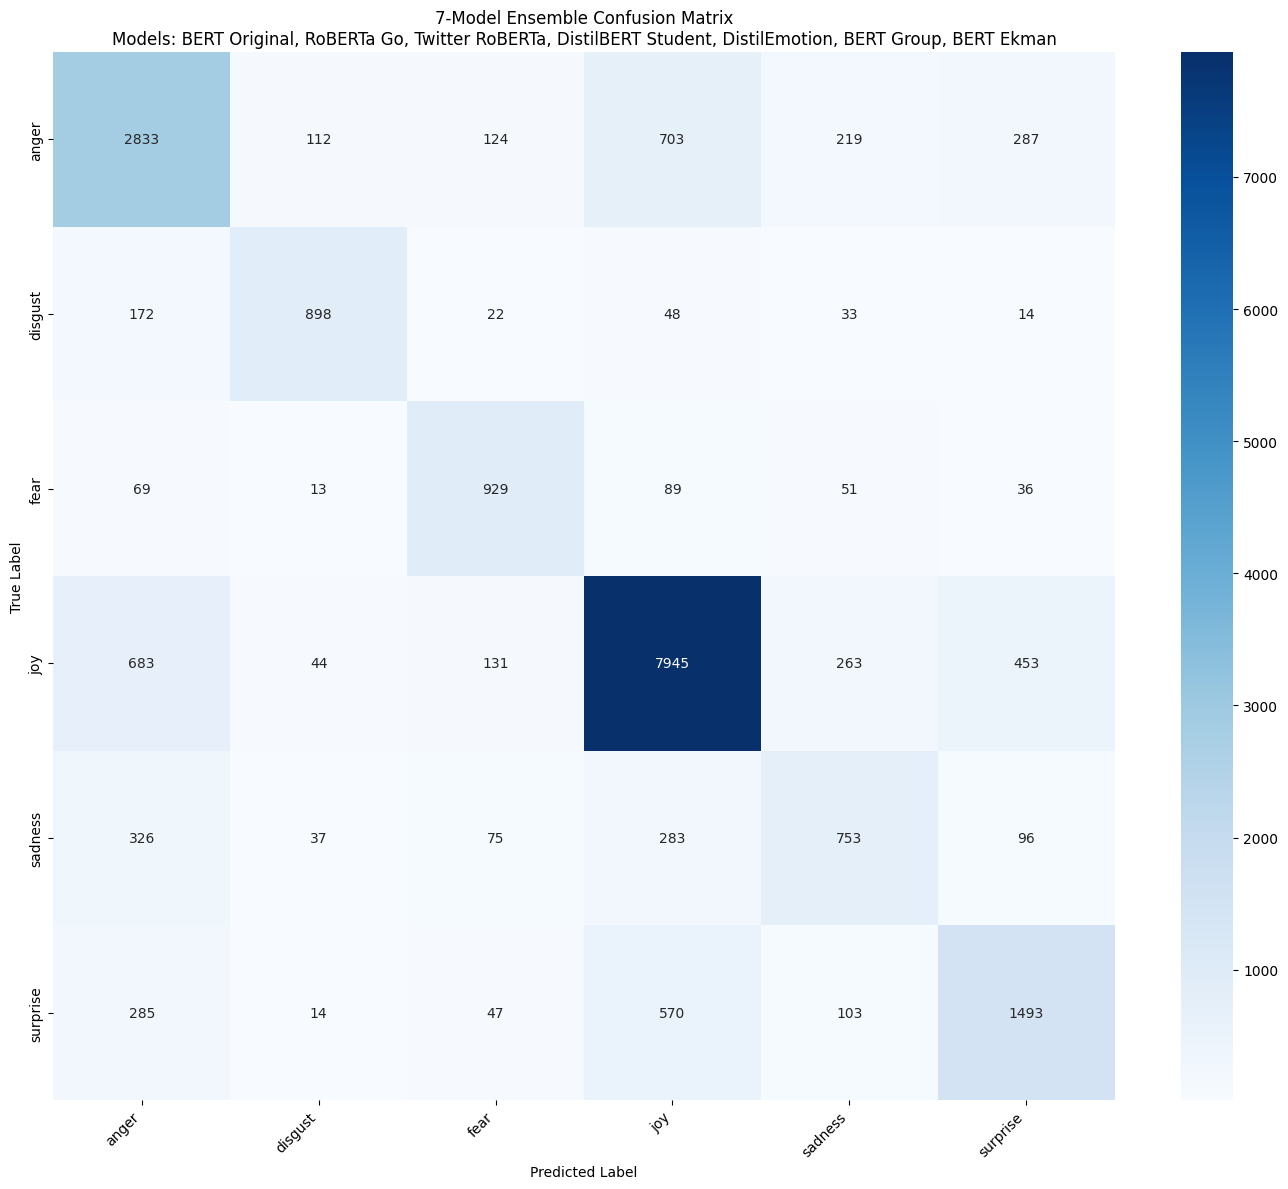


--- Classification Report ---
              precision    recall  f1-score   support

       anger     0.6486    0.6622    0.6553      4278
     disgust     0.8032    0.7565    0.7792      1187
        fear     0.6995    0.7826    0.7388      1187
         joy     0.8243    0.8346    0.8295      9519
     sadness     0.5295    0.4796    0.5033      1570
    surprise     0.6276    0.5943    0.6105      2512

    accuracy                         0.7333     20253
   macro avg     0.6888    0.6850    0.6861     20253
weighted avg     0.7314    0.7333    0.7320     20253


=== Step 4 Complete! Analysis saved. ===


In [31]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
import os

# ==========================================
# CONFIGURATION
# ==========================================
print("\n=== Step 4: 7-Model Ensemble Visualization & Confusion Matrix =========\n")

# Defined 7 Models
MODEL_MAP = [
    # 1. BERT Original
    {
        "name": "BERT Original",
        "path": "./results_bert", 
        "tokenizer_id": "monologg/bert-base-cased-goemotions-original", 
        "weight": 0.3
    },
    # 2. RoBERTa
    {
        "name": "RoBERTa Go",
        "path": "./results_roberta", 
        "tokenizer_id": "SamLowe/roberta-base-go_emotions", 
        "weight": 0
    },
    # 3. Twitter RoBERTa 
    {
        "name": "Twitter RoBERTa",
        "path": "./results_twitter_roberta", 
        "tokenizer_id": "cardiffnlp/twitter-roberta-base-emotion", 
        "weight": 0.1
    },
    # 4. DistilBERT Student 
    {
        "name": "DistilBERT Student",
        "path": "./results_distilbert_student", 
        "tokenizer_id": "joeddav/distilbert-base-uncased-go-emotions-student", 
        "weight": 0.2
    },
    # 5. DistilEmotion 
    {
        "name": "DistilEmotion",
        "path": "./results_distil_emotion", 
        "tokenizer_id": "j-hartmann/emotion-english-distilroberta-base", 
        "weight": 0.1
    },
    # 6. BERT Group 
    {
        "name": "BERT Group",
        "path": "./results_bert_group", 
        "tokenizer_id": "monologg/bert-base-cased-goemotions-group", 
        "weight": 0.2
    },
    # 7. BERT Ekman 
    {
        "name": "BERT Ekman",
        "path": "./results_bert_ekman", 
        "tokenizer_id": "monologg/bert-base-cased-goemotions-ekman", 
        "weight": 0.1
    }
]

MAX_LENGTH = 64
BATCH_SIZE = 32
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==========================================
# 1. LOAD VALIDATION DATA & RESTORE TEXT
# ==========================================
print("--- Loading Validation Data ---")

try:
    pt_file = "preprocessed_bert.pt" 
    base_tokenizer_id = "monologg/bert-base-cased-goemotions-original"

    if not os.path.exists(pt_file):
        files = [f for f in os.listdir(".") if f.endswith(".pt") and "preprocessed" in f]
        if not files:
            raise FileNotFoundError("No preprocessed .pt file found!")
        pt_file = files[0]
        print(f"Default file not found, falling back to: {pt_file}")

    print(f"Loading data from: {pt_file}")
    data = torch.load(pt_file, weights_only=False)
    
    y_val_true = data['y_val'].numpy()
    label_encoder = data['label_encoder']
    class_names = label_encoder.classes_
    
    print(f"Validation samples: {len(y_val_true)}")
    print(f"Classes ({len(class_names)}): {class_names}")

    # 2. Restore Text from Tensor IDs
    print(f"Restoring raw text using: {base_tokenizer_id}...")
    base_tokenizer = AutoTokenizer.from_pretrained(base_tokenizer_id)
    
    val_input_ids = data['val_encodings']['input_ids']
    val_texts = []
    
    # Batch decode for speed
    for ids in tqdm(val_input_ids, desc="Decoding Text"):
        text = base_tokenizer.decode(ids, skip_special_tokens=True)
        val_texts.append(text)
        
except Exception as e:
    print(f"[Critical Error] Data loading failed: {e}")
    exit(1)

# ==========================================
# 2. ENSEMBLE INFERENCE LOOP
# ==========================================
print("\n--- Running Ensemble Inference on Validation Set ---")

all_model_probs = []
used_weights = []
valid_models = []

for entry in MODEL_MAP:
    name = entry["name"]
    model_path = entry["path"]
    tokenizer_id = entry["tokenizer_id"]
    weight = entry["weight"]
    
    print(f"\nProcessing: {name}")
    
    if not os.path.exists(model_path):
        print(f"  [Skip] Model path not found: {model_path}")
        continue

    try:
        # Load Tokenizer & Model
        tokenizer = AutoTokenizer.from_pretrained(tokenizer_id) 
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
        model.to(DEVICE)
        model.eval()
        
    except Exception as e:
        print(f"  [Error] Failed to load {name}: {e}")
        continue

    model_probs = []
    
    # Batch Prediction
    for i in tqdm(range(0, len(val_texts), BATCH_SIZE), desc=f"  Predicting {name}"):
        batch_texts = val_texts[i : i + BATCH_SIZE]
        
        inputs = tokenizer(
            batch_texts, 
            padding=True, 
            truncation=True, 
            max_length=MAX_LENGTH, 
            return_tensors="pt"
        ).to(DEVICE)
        
        with torch.no_grad():
            outputs = model(**inputs)
            # Softmax to get probabilities (sum to 1)
            probs = F.softmax(outputs.logits, dim=-1)
            model_probs.append(probs.cpu().numpy())
            
    full_probs = np.concatenate(model_probs, axis=0)
    print(f"  Output Shape: {full_probs.shape}")

    # Dimension Check
    if len(all_model_probs) > 0:
        prev_shape = all_model_probs[0].shape
        if full_probs.shape[1] != prev_shape[1]:
            print(f"  [CRITICAL] Shape mismatch! This model has {full_probs.shape[1]} classes, ensemble expects {prev_shape[1]}. Skipping.")
            continue

    all_model_probs.append(full_probs)
    used_weights.append(weight)
    valid_models.append(name)
    
    # Cleanup memory
    del model, tokenizer, inputs, outputs
    torch.cuda.empty_cache()

# ==========================================
# 3. AGGREGATION & PLOTTING
# ==========================================
print("\n--- Generating Visualization ---")

if not all_model_probs:
    raise ValueError("No models executed successfully!")

# Recalculate weights (Normalization) to ensure they sum to 1
total_weight = sum(used_weights)
if total_weight == 0:
    print("[Warning] Total weight is 0. Using equal weights.")
    norm_weights = [1.0/len(used_weights)] * len(used_weights)
else:
    norm_weights = [w/total_weight for w in used_weights]

print(f"Models Used: {valid_models}")
print(f"Effective Weights: {np.round(norm_weights, 2)}")

# Weighted Average
final_probs = np.zeros_like(all_model_probs[0])
for i, probs in enumerate(all_model_probs):
    final_probs += probs * norm_weights[i]

# Get Predictions
y_val_pred = np.argmax(final_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred)

# Plotting
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.title(f'7-Model Ensemble Confusion Matrix\nModels: {", ".join(valid_models)}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save Image
save_path = "confusion_matrix_ensemble_7models.png"
plt.savefig(save_path)
print(f"Confusion matrix saved to: {save_path}")
plt.show()

# Classification Report
print("\n--- Classification Report ---")
report = classification_report(y_val_true, y_val_pred, target_names=class_names, digits=4)
print(report)

# Save Report
with open("classification_report_ensemble.txt", "w") as f:
    f.write(report)

print("\n=== Step 4 Complete! Analysis saved. ===")

In [32]:
import torch
import torch.nn.functional as F
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
import os

# --- Configuration ---
print("\n=== Step 5: 7-Model Ensemble Inference =========\n")

MODEL_MAP = [
    # 1. BERT Original 
    {
        "path": "./results_bert", 
        "tokenizer_id": "monologg/bert-base-cased-goemotions-original", 
        "weight": 0.3
    },
    # 2. RoBERTa 
    {
        "path": "./results_roberta", 
        "tokenizer_id": "SamLowe/roberta-base-go_emotions", 
        "weight": 0
    },
    # 3. Twitter RoBERTa 
    {
        "path": "./results_twitter_roberta", 
        "tokenizer_id": "cardiffnlp/twitter-roberta-base-emotion", 
        "weight": 0.1
    },
    # 4. DistilBERT Student 
    {
        "path": "./results_distilbert_student", 
        "tokenizer_id": "joeddav/distilbert-base-uncased-go-emotions-student", 
        "weight": 0.2
    },
    # 5. DistilEmotion 
    {
        "path": "./results_distil_emotion", 
        "tokenizer_id": "j-hartmann/emotion-english-distilroberta-base", 
        "weight": 0.1
    },
    # 6. BERT Group 
    {
        "path": "./results_bert_group", 
        "tokenizer_id": "monologg/bert-base-cased-goemotions-group", 
        "weight": 0.2
    },
    # 7. BERT Ekman 
    {
        "path": "./results_bert_ekman", 
        "tokenizer_id": "monologg/bert-base-cased-goemotions-ekman", 
        "weight": 0.1
    }
]

MAX_LENGTH = 64
BATCH_SIZE = 32
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Load Raw Test Data ---
print("--- Loading Metadata ---")
try:
    if os.path.exists("preprocessed_bert.pt"):
        meta_file = "preprocessed_bert.pt"
    else:
        # Fallback
        pt_files = [f for f in os.listdir(".") if f.startswith("preprocessed") and f.endswith(".pt")]
        if not pt_files:
            raise FileNotFoundError("No preprocessed metadata found!")
        meta_file = pt_files[0]
        
    print(f"Loading metadata from: {meta_file}")
    meta_data = torch.load(meta_file, weights_only=False)
    
    test_ids = meta_data['test_ids']
    label_encoder = meta_data['label_encoder']
    
    if 'test_texts' not in locals():
        print("[Info] 'test_texts' variable not found in memory.")
        if os.path.exists("test.csv"):
             print("Loading from test.csv...")
             df_test_raw = pd.read_csv("test.csv")
             if 'text_cleaned' in df_test_raw.columns:
                 test_texts = df_test_raw['text_cleaned'].tolist()
             elif 'text' in df_test_raw.columns:
                 test_texts = df_test_raw['text'].tolist()
             else:
                 raise ValueError("Could not find 'text' or 'text_cleaned' column in test.csv")
        else:
             print("[Warning] Could not find test.csv. Assuming 'test_texts' exists from previous cells.")
             
except Exception as e:
    print(f"[Error] Metadata load failed: {e}")
    raise e

print(f"Test samples: {len(test_texts)}")
print(f"Ensembling {len(MODEL_MAP)} models...")

all_model_probs = []
used_weights = []

# --- Loop Through Models ---
for entry in MODEL_MAP:
    model_path = entry["path"]
    tokenizer_id = entry["tokenizer_id"]
    weight = entry["weight"]
    
    print(f"\n------------------------------------------------------")
    print(f"Processing: {model_path}")
    print(f"Tokenizer:  {tokenizer_id}")
    print(f"------------------------------------------------------")
    
    try:
        # 1. Load Tokenizer
        tokenizer = AutoTokenizer.from_pretrained(tokenizer_id)
        
        # 2. Load Model (Local Weights)
        if not os.path.exists(model_path):
             print(f"  [Skip] Path not found: {model_path}")
             continue
             
        model = AutoModelForSequenceClassification.from_pretrained(model_path)
        model.to(DEVICE)
        model.eval()
        
        used_weights.append(weight)
        
    except Exception as e:
        print(f"  [Error] Failed to load {model_path}. Details: {e}")
        continue

    model_probs = []
    
    # Batch Inference
    for i in tqdm(range(0, len(test_texts), BATCH_SIZE), desc="Predicting"):
        batch_texts = test_texts[i : i + BATCH_SIZE]
        
        inputs = tokenizer(
            batch_texts, 
            padding=True, 
            truncation=True, 
            max_length=MAX_LENGTH, 
            return_tensors="pt"
        ).to(DEVICE)
        
        with torch.no_grad():
            outputs = model(**inputs)
            probs = F.softmax(outputs.logits, dim=-1)
            model_probs.append(probs.cpu().numpy())
            
    # Concatenate batches for this model
    full_probs_for_model = np.concatenate(model_probs, axis=0)
    
    # Safety Check: Dimensions
    if len(all_model_probs) > 0:
        if full_probs_for_model.shape[1] != all_model_probs[0].shape[1]:
            print(f"  [CRITICAL] Shape mismatch. Expected {all_model_probs[0].shape[1]} classes, got {full_probs_for_model.shape[1]}. Skipping this model.")
            used_weights.pop()
            continue

    all_model_probs.append(full_probs_for_model)
    
    # Clean up
    del model, tokenizer, inputs, outputs
    torch.cuda.empty_cache()

# --- Weighted Averaging ---
print("\nCalculating Weighted Average...")

if len(all_model_probs) == 0:
    raise ValueError("No models loaded successfully!")

# Normalize weights
total_weight = sum(used_weights)
if total_weight == 0:
    print("[Info] Total weight is 0. Using equal weights.")
    norm_weights = [1.0/len(used_weights)] * len(used_weights)
else:
    norm_weights = [w / total_weight for w in used_weights]

print(f"Normalized Weights: {np.round(norm_weights, 2)}")

final_probs = np.zeros_like(all_model_probs[0])

for i, probs in enumerate(all_model_probs):
    final_probs += probs * norm_weights[i]

# --- Generate Submission ---
predicted_class_ids = np.argmax(final_probs, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_class_ids)

PATH_ENSEMBLE = "submission_ensemble_7models.csv"
submission_df = pd.DataFrame({
    'id': test_ids,
    'emotion': predicted_labels
})

submission_df.to_csv(PATH_ENSEMBLE, index=False)
print(f"\nEnsemble submission saved to: {PATH_ENSEMBLE}")
print("=== Step 5 Complete! ==================================")


=== Step 5: 7-Model Ensemble Inference =========

--- Loading Metadata ---
Loading metadata from: preprocessed_bert.pt
Test samples: 16281
Ensembling 7 models...

------------------------------------------------------
Processing: ./results_bert
Tokenizer:  monologg/bert-base-cased-goemotions-original
------------------------------------------------------


Predicting: 100%|██████████| 509/509 [00:11<00:00, 44.51it/s]



------------------------------------------------------
Processing: ./results_roberta
Tokenizer:  SamLowe/roberta-base-go_emotions
------------------------------------------------------


Predicting: 100%|██████████| 509/509 [00:10<00:00, 46.54it/s]



------------------------------------------------------
Processing: ./results_twitter_roberta
Tokenizer:  cardiffnlp/twitter-roberta-base-emotion
------------------------------------------------------


Predicting: 100%|██████████| 509/509 [00:10<00:00, 46.61it/s]



------------------------------------------------------
Processing: ./results_distilbert_student
Tokenizer:  joeddav/distilbert-base-uncased-go-emotions-student
------------------------------------------------------


Predicting: 100%|██████████| 509/509 [00:06<00:00, 84.18it/s]



------------------------------------------------------
Processing: ./results_distil_emotion
Tokenizer:  j-hartmann/emotion-english-distilroberta-base
------------------------------------------------------


Predicting: 100%|██████████| 509/509 [00:06<00:00, 84.05it/s]



------------------------------------------------------
Processing: ./results_bert_group
Tokenizer:  monologg/bert-base-cased-goemotions-group
------------------------------------------------------


Predicting: 100%|██████████| 509/509 [00:11<00:00, 44.69it/s]



------------------------------------------------------
Processing: ./results_bert_ekman
Tokenizer:  monologg/bert-base-cased-goemotions-ekman
------------------------------------------------------


Predicting: 100%|██████████| 509/509 [00:11<00:00, 44.48it/s]


Calculating Weighted Average...
Normalized Weights: [0.3 0.  0.1 0.2 0.1 0.2 0.1]

Ensemble submission saved to: submission_ensemble_7models.csv
=== Step 5 Complete! ==================================
